# I Solving the Sum of Two Digits Programming Challenge

In [ ]:
%%writefile sum.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Overwriting sum.cpp


In [ ]:
!g++ sum.cpp -o sum

### Test input output files

In [ ]:
%%writefile input1.txt
4 8

Overwriting input1.txt


In [ ]:
%%writefile output1.txt
12

Overwriting output1.txt


In [ ]:
%%writefile input2.txt
-5 9

Overwriting input2.txt


In [ ]:
%%writefile output2.txt
4

Overwriting output2.txt


In [ ]:
!./sum < input1.txt

12

In [ ]:
!./sum < input2.txt

4

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [ ]:
!grep -xvFf output1.txt output1.txt 

In [ ]:
!grep -xvFf output1.txt output2.txt 

4


In [ ]:
!grep -xvFf output2.txt output1.txt 

12


In [ ]:
!./sum < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [ ]:
!./sum < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

## Python

In [ ]:
%%writefile sum.py
# python3


def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Overwriting sum.py


In [ ]:
!python3 sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [ ]:
!python3 sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [ ]:
%%writefile max_pairwise_product1.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Overwriting max_pairwise_product1.cpp


In [ ]:
!g++ max_pairwise_product1.cpp -o max_pairwise_product1

### Test 1: lagest input numbers 200000 200000 in the input

In [ ]:
%%writefile input1.txt
5
1 3 200000 9 200000 23

Overwriting input1.txt


In [ ]:
!./max_pairwise_product1 < input1.txt

1345294336


In [ ]:
%%writefile max_pairwise_product2.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Overwriting max_pairwise_product2.cpp


In [ ]:
!g++ max_pairwise_product2.cpp -o max_pairwise_product2
!./max_pairwise_product2 < input1.txt

40000000000


### Test 2  generate a tests file with the maximun n 200000 numbres and measure time

In [ ]:
import random
from os import remove

try:
	remove("input3.txt")
except OSError:
	pass

n = 200000
f = open("input3.txt", "a")
f.write(str(n+2)+"\n")
f.write("200000\n")
for i in range(n):
	r1 = random.randint(0, 200000)
	f.write(str(r1)+"\n")
f.write("200000")
f.close()

In [ ]:
import random
from os import remove

try:
	remove("input4.txt")
except OSError:
	pass

n = 200
f = open("input4.txt", "a")
f.write(str(n+2)+"\n")
f.write("200000\n")
for i in range(n):
	r1 = random.randint(0, 200000)
	f.write(str(r1)+"\n")
f.write("200000")
f.close()

### Efficient solution 

Stress tests 

In [ ]:
%%writefile main.cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <chrono>
#include <ctime>
#include <bits/stdc++.h>

using namespace std;

long long maxPairwiseProduct(const vector<unsigned long long int>& numbers) {
  long long max_product = 0LL;
  long long aux_product = 0LL;
  int n = numbers.size();

  for (int first = 0; first < n; ++first) {
    for (int second = first + 1; second < n; ++second) {
      aux_product =  (long long) numbers[first] * numbers[second];
      if ( max_product < aux_product)  {
        max_product = aux_product;
      }
    }
  }
  return max_product;
}

long long maxPairwiseProductList(vector<unsigned long long int>& numbers){
  sort(numbers.begin(), numbers.end());
  return numbers[numbers.size()-1]*numbers[numbers.size()-2];
}

long long maxPairwiseProductFast(vector<unsigned long long int>& numbers){  
  long long n = numbers.size();
  int index1 = 0;
  int index2 = 0;
    
  for(int i= 1; i < n; i++){
    if(numbers[i] > numbers[index1]){
      index1 = i;
    }
  }
    
  for(int i= 1; i < n; i++){
    if(i!=index1 && numbers[i]>numbers[index2]){
      index2 = i;
    }
  } 
    
  return numbers[index1]*numbers[index2];
}

int main() {
  int n;
  cin >> n;
  unsigned long long int maxNumber = 0LL;
  unsigned long long int maxSecondNumber = 0LL;
  unsigned long long int aux = 0LL;
  vector <unsigned long long int> numbers (n);

  auto start = chrono::high_resolution_clock::now();

  for (int i = 0; i < n; ++i) {
    cin >> numbers[i];;
    if(maxNumber < numbers[i]){
      maxSecondNumber = maxNumber;
      maxNumber = numbers[i];
    } else if(maxSecondNumber < numbers[i]){
      maxSecondNumber = numbers[i];
    }
  }

  unsigned long long int maxProductUltraFast = maxNumber * maxSecondNumber;
  
  auto stop = chrono::high_resolution_clock::now();

  auto ms_int = chrono::duration_cast<chrono::milliseconds>(stop - start);
  auto reading_time = ms_int.count();

  cout << "Result using Ultra Fast method: " << maxProductUltraFast << endl;
  cout << "Execution time: " << ms_int.count() << " ms" << endl;

  cout << endl;

  start = chrono::high_resolution_clock::now();
  cout << "Result using Fast method: " << maxPairwiseProductFast(numbers) << endl;
  stop = chrono::high_resolution_clock::now();
  ms_int = chrono::duration_cast<chrono::milliseconds>(stop - start);
  cout << "Execution time: " << reading_time + ms_int.count() << " ms" << endl;

  cout << endl;
  
  start = chrono::high_resolution_clock::now();
  cout << "Result using List method: " << maxPairwiseProductList(numbers) << endl;
  stop = chrono::high_resolution_clock::now();
  ms_int = chrono::duration_cast<chrono::milliseconds>(stop - start);
  cout << "Execution time: " << reading_time + ms_int.count() << " ms" << endl;

  cout << endl;

  start = chrono::high_resolution_clock::now();
  cout << "Result using naive method: " << maxPairwiseProduct(numbers) << endl;
  stop = chrono::high_resolution_clock::now();
  ms_int = chrono::duration_cast<chrono::milliseconds>(stop - start);
  cout << "Execution time: " << reading_time + ms_int.count() << " ms" << endl;
  return 0;
}

Overwriting main.cpp


In [ ]:
!g++ main.cpp -o main
!./main < input1.txt

Result using Ultra Fast method: 40000000000
Execution time: 0 ms

Result using Fast method: 40000000000
Execution time: 0 ms

Result using List method: 40000000000
Execution time: 0 ms

Result using naive method: 40000000000
Execution time: 0 ms


Measure with test file of the maximun n 200000 numbres 

In [ ]:
!timeout 1m ./main < input3.txt

Result using Ultra Fast method: 40000000000
Execution time: 34 ms

Result using Fast method: 40000000000
Execution time: 35 ms

Result using List method: 40000000000
Execution time: 82 ms



## Python

In [ ]:
%%writefile main.py
import time

def maxPairwiseProduct(numbers):
    max_product = 0
    aux_product = 0
    n = len(numbers)
    for first in range(n):
        for second in range(1,n):
            aux_product = numbers[first] * numbers[second]
            if(max_product < aux_product):
                max_product = aux_product
    return max_product

def maxPairwiseProductList(numbers):
	numbers.sort()
	return numbers[-1]*numbers[-2]

def maxPairwiseProductFast(numbers):
    n = len(numbers)
    index1 = 0
    for i in range(n):
        if(numbers[i] > numbers[index1]):
            index1 = i
    
    index2 = 0
    for i in range(n):
        if(numbers[i] != numbers[index1] and numbers[i] > numbers[index2]):
            index2 = i
    return numbers[index1]*numbers[index2]

n = input()
maxNumber = 0
maxSecondNumber = 0
aux = 0
numbers = []

start = time.time()

for i in range(int(n)):
    numbers.append(int(input()))
    if(maxNumber < int(numbers[i])):
        maxSecondNumber = maxNumber
        maxNumber = numbers[i]
    elif(maxSecondNumber < numbers[i]):
        maxSecondNumber = numbers[i]

maxProductUltraFast = maxNumber * maxSecondNumber

stop = time.time()

ms_int = stop-start

reading_time = ms_int

print("Result using Ultra Fast method:",maxProductUltraFast)
print("Execution time:",str(ms_int),"s")
print()

start = time.time()
print("Result using Product Fast method:",maxPairwiseProductFast(numbers))
stop = time.time()
ms_int = stop-start
print("Execution time:",str(float(reading_time + ms_int)),"s")
print()

start = time.time()
print("Result using List method:",maxPairwiseProductList(numbers))
stop = time.time()
ms_int = stop-start
print("Execution time:",str(float(reading_time + ms_int)),"s")
print()

start = time.time()
print("Result using naive method:",maxPairwiseProduct(numbers))
stop = time.time()
ms_int = stop-start
print("Execution time:",str(float(reading_time + ms_int)),"s")

Overwriting main.py


In [ ]:
!timeout 1m python3 main.py < input4.txt

Result using Ultra Fast method: 40000000000
Execution time: 0.00018906593322753906 s

Result using Product Fast method: 40000000000
Execution time: 0.00021338462829589844 s

Result using List method: 40000000000
Execution time: 0.00020241737365722656 s

Result using naive method: 40000000000
Execution time: 0.002454996109008789 s


In [ ]:
!timeout 1m python3 main.py < input3.txt

Result using Ultra Fast method: 40000000000
Execution time: 0.18005704879760742 s

Result using Product Fast method: 40000000000
Execution time: 0.2024526596069336 s

Result using List method: 40000000000
Execution time: 0.20957255363464355 s



#**Mi ejecucion en coursera**


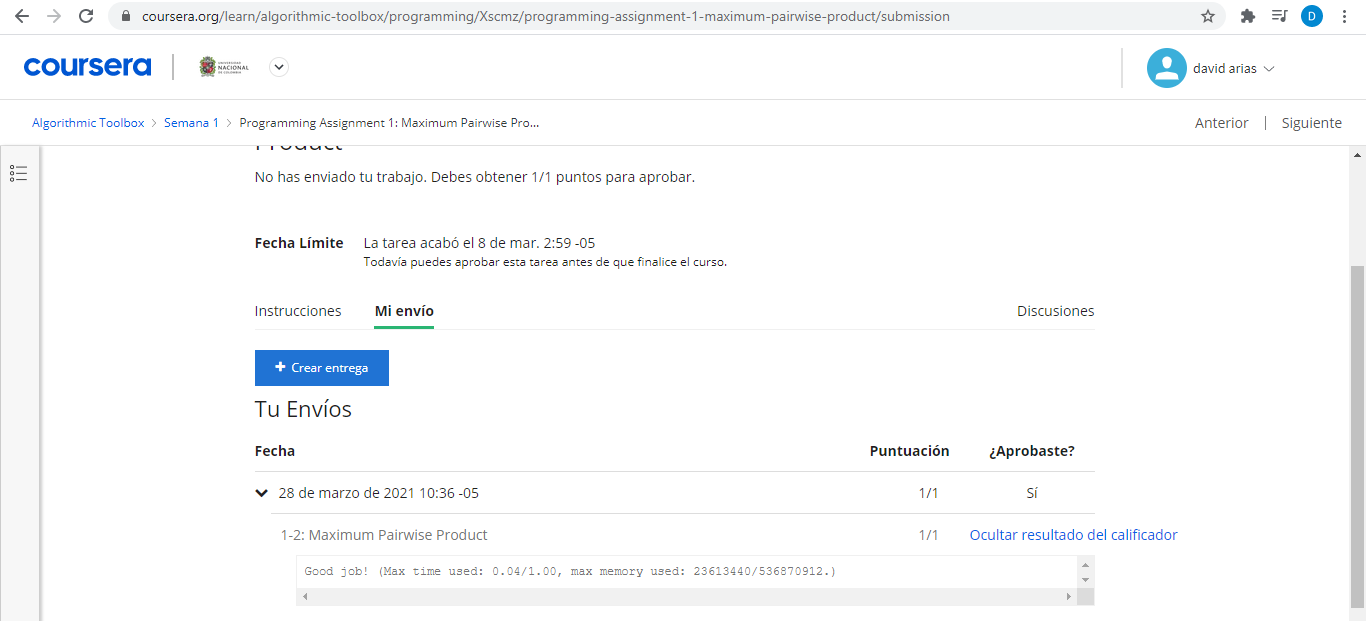